<a href="https://colab.research.google.com/github/enam007/Pandas/blob/main/time_series_analysis_using_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DateTime Index and Resampling

In [ ]:
import pandas as pd
url ='https://raw.githubusercontent.com/codebasics/py/master/pandas/14_ts_datetimeindex/aapl.csv'
df =pd.read_csv(url,parse_dates=['Date'],index_col ='Date')
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-06-30,144.45,144.96,143.78,144.02,23024107


Reason for converting the str format of date to datetime type and making it index is that as we know this contains data for 1 whole year and if we want to retrive data for only jan or any other month we can do it very easly as follows  

In [ ]:
df["2017-01"]

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-31,121.15,121.39,120.62,121.35,49200993
2017-01-30,120.93,121.63,120.66,121.63,30377503
2017-01-27,122.14,122.35,121.60,121.95,20562944
2017-01-26,121.67,122.44,121.60,121.94,26337576
2017-01-25,120.42,122.10,120.28,121.88,32586673
2017-01-24,119.55,120.10,119.50,119.97,23211038
2017-01-23,120.00,120.81,119.77,120.08,22050218
2017-01-20,120.45,120.45,119.73,120.00,32597892
2017-01-19,119.40,120.09,119.37,119.78,25597291


Find avg price of apples stock in the month of january

In [ ]:
df['2017-01'].Close.mean()

119.57000000000001

get data for any specific date

In [ ]:
df['2017-01-06']

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-06,116.78,118.16,116.47,117.91,31751900


Get data for 1 week

In [ ]:
df['2017-01-07':'2017-01-01']

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-06,116.78,118.16,116.47,117.91,31751900
2017-01-05,115.92,116.86,115.81,116.61,22193587
2017-01-04,115.85,116.51,115.75,116.02,21118116
2017-01-03,115.80,116.33,114.76,116.15,28781865


What if we want to get the average price for all the months

In [ ]:
df.Close.resample('M').mean()

Date
2016-07-31     99.473333
2016-08-31    107.665217
2016-09-30    110.857143
2016-10-31    115.707143
2016-11-30    110.154286
2016-12-31    114.335714
2017-01-31    119.570000
2017-02-28    133.713684
2017-03-31    140.617826
2017-04-30    142.886842
2017-05-31    152.227727
2017-06-30    147.831364
2017-07-31    143.625000
Freq: M, Name: Close, dtype: float64

We can also plot the same

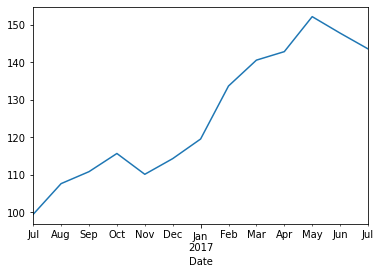

In [ ]:
df.Close.resample('M').mean().plot()

We can also sample weekly 

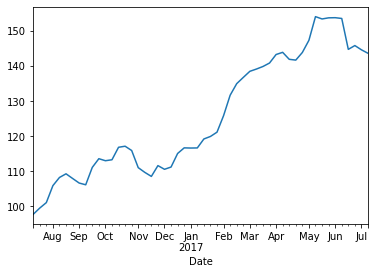

In [ ]:
df.Close.resample('W').mean().plot()

### Date Range

Lets say we have data for june months and date is not available in data so how to set date knowing that the stock market is closed on weekends

In [ ]:
url ='https://raw.githubusercontent.com/codebasics/py/master/pandas/15_ts_date_range/aapl_no_dates.csv'
df = pd.read_csv(url)
df.head()

,Open,High,Low,Close,Volume
0,153.17,153.33,152.22,153.18,16404088
1,153.58,155.45,152.89,155.45,27770715
2,154.34,154.45,153.46,153.93,25331662
3,153.90,155.81,153.78,154.45,26624926
4,155.02,155.98,154.48,155.37,21069647


To insert date we have a date range function


In [ ]:
rng = pd.date_range(start='6/1/2017',end='6/30/2017',freq='B')   # format MM/DD/YYYY    'B' for only business Days
df.set_index(rng,inplace=True)
df

,Open,High,Low,Close,Volume
2017-06-01,153.17,153.33,152.22,153.18,16404088
2017-06-02,153.58,155.45,152.89,155.45,27770715
2017-06-05,154.34,154.45,153.46,153.93,25331662
2017-06-06,153.90,155.81,153.78,154.45,26624926
2017-06-07,155.02,155.98,154.48,155.37,21069647
2017-06-08,155.25,155.54,154.40,154.99,21250798
2017-06-09,155.19,155.19,146.02,148.98,64882657
2017-06-12,145.74,146.09,142.51,145.42,72307330
2017-06-13,147.16,147.45,145.15,146.59,34165445
2017-06-14,147.50,147.50,143.84,145.16,31531232


We can also set the price for weekends using asfreq method

In [ ]:
df.asfreq(freq='D',method='pad')

,Open,High,Low,Close,Volume
2017-06-01,153.17,153.33,152.22,153.18,16404088
2017-06-02,153.58,155.45,152.89,155.45,27770715
2017-06-03,153.58,155.45,152.89,155.45,27770715
2017-06-04,153.58,155.45,152.89,155.45,27770715
2017-06-05,154.34,154.45,153.46,153.93,25331662
2017-06-06,153.90,155.81,153.78,154.45,26624926
2017-06-07,155.02,155.98,154.48,155.37,21069647
2017-06-08,155.25,155.54,154.40,154.99,21250798
2017-06-09,155.19,155.19,146.02,148.98,64882657
2017-06-10,155.19,155.19,146.02,148.98,64882657


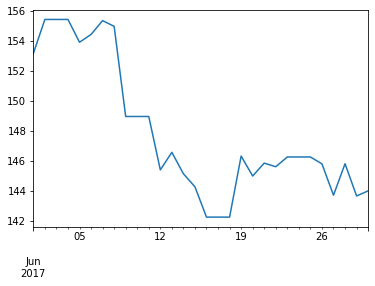

In [ ]:
df.asfreq(freq='D',method='pad').Close.plot()

Some time it may happen that we know the start day but don't know the end day then for such scenanrio we can use 

In [ ]:
rng =pd.date_range(start='1/1/2017',periods=72,freq='B')  ## this will generate 72 days starting from 1/1/2017 leaving all weekends
rng,len(rng)

(DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
                '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
                '2017-01-12', '2017-01-13', '2017-01-16', '2017-01-17',
                '2017-01-18', '2017-01-19', '2017-01-20', '2017-01-23',
                '2017-01-24', '2017-01-25', '2017-01-26', '2017-01-27',
                '2017-01-30', '2017-01-31', '2017-02-01', '2017-02-02',
                '2017-02-03', '2017-02-06', '2017-02-07', '2017-02-08',
                '2017-02-09', '2017-02-10', '2017-02-13', '2017-02-14',
                '2017-02-15', '2017-02-16', '2017-02-17', '2017-02-20',
                '2017-02-21', '2017-02-22', '2017-02-23', '2017-02-24',
                '2017-02-27', '2017-02-28', '2017-03-01', '2017-03-02',
                '2017-03-03', '2017-03-06', '2017-03-07', '2017-03-08',
                '2017-03-09', '2017-03-10', '2017-03-13', '2017-03-14',
                '2017-03-15', '2017-03-16', '2017-03-17', '2017-

The above method can also be used to generate test data as for example check below


In [ ]:
import numpy as np
rng = pd.date_range(start='1/1/2017',periods=72,freq="H")  # generate hourly data
ts =pd.Series(np.random.randint(1,10,len(rng)),index=rng)
ts.head(10)

2017-01-01 00:00:00    3
2017-01-01 01:00:00    7
2017-01-01 02:00:00    9
2017-01-01 03:00:00    8
2017-01-01 04:00:00    4
2017-01-01 05:00:00    2
2017-01-01 06:00:00    7
2017-01-01 07:00:00    3
2017-01-01 08:00:00    4
2017-01-01 09:00:00    8
Freq: H, dtype: int64

In [ ]:
import pandas as pd
url='https://github.com/codebasics/py/raw/master/pandas/16_ts_holidays/aapl_no_dates.csv'
df = pd.read_csv(url)
df.head(5)

,Open,High,Low,Close,Volume
0,144.88,145.30,143.10,143.50,14277848
1,143.69,144.79,142.72,144.09,21569557
2,143.02,143.50,142.41,142.73,24128782
3,142.90,144.75,142.90,144.18,19201712
4,144.11,145.95,143.37,145.06,21090636


In [ ]:
rng =pd.date_range(start='7/1/2017',end='7/21/2017',freq='B')
rng

DatetimeIndex(['2017-07-03', '2017-07-04', '2017-07-05', '2017-07-06',
               '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14', '2017-07-17', '2017-07-18',
               '2017-07-19', '2017-07-20', '2017-07-21'],
              dtype='datetime64[ns]', freq='B')

Notice that in above range we have that 4th july also but 4th of july is holiday in US ....Then how to handel such cases for this we can create custom customBusinessDay

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
usb = CustomBusinessDay(calendar=USFederalHolidayCalendar())
usb

<CustomBusinessDay>

In [ ]:
rng =pd.date_range(start='7/1/2017',end='7/21/2017',freq=usb)
rng

DatetimeIndex(['2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17', '2017-07-18', '2017-07-19',
               '2017-07-20', '2017-07-21'],
              dtype='datetime64[ns]', freq='C')

Now as can be seen 4th of july is not present in the range

In [ ]:
df.set_index(rng,inplace=True)
df

,Open,High,Low,Close,Volume
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-10,144.11,145.95,143.37,145.06,21090636
2017-07-11,144.73,145.85,144.38,145.53,19781836
2017-07-12,145.87,146.18,144.82,145.74,24884478
2017-07-13,145.50,148.49,145.44,147.77,25199373
2017-07-14,147.97,149.33,147.33,149.04,20132061
2017-07-17,148.82,150.90,148.57,149.56,23793456


In library There is only USFederal Calendar present but what if we want to create our own holiday calendar for eg India Holiday Calendar or my Birthday Calender

In [ ]:
from pandas.tseries.holiday import AbstractHolidayCalendar, nearest_workday,Holiday

class customHoildayCalendar(AbstractHolidayCalendar):
  '''
  This class is used to create custom holiday calenders
  '''
  rules =[
          Holiday('Custom Holiday',month=10,day=18)
  ]

my_custom_calendar = CustomBusinessDay(calendar= customHoildayCalendar())
my_custom_calendar

<CustomBusinessDay>

In [ ]:
rng = pd.date_range(start='10/1/2021',end='10/30/2021',freq=my_custom_calendar)
rng

DatetimeIndex(['2021-10-01', '2021-10-04', '2021-10-05', '2021-10-06',
               '2021-10-07', '2021-10-08', '2021-10-11', '2021-10-12',
               '2021-10-13', '2021-10-14', '2021-10-15', '2021-10-19',
               '2021-10-20', '2021-10-21', '2021-10-22', '2021-10-25',
               '2021-10-26', '2021-10-27', '2021-10-28', '2021-10-29'],
              dtype='datetime64[ns]', freq='C')

We can see that 18th october is missing

Also in US if the hoilday is on sat it is observed on its nearest workday so how to handel such cases lets see

In [ ]:
from pandas.tseries.holiday import AbstractHolidayCalendar,nearest_workday,Holiday

class myCustomCalender2(AbstractHolidayCalendar):
  '''
  This Calendar handel cases if the Holiday is on Saturday and observerd on friday
  '''
  rules =[
          Holiday('custom Holiday',month=10,day=17,observance=nearest_workday)
  ]



In [ ]:
my_custom_calendar2 = CustomBusinessDay(calendar = myCustomCalender2())
my_custom_calendar2

<CustomBusinessDay>

In [ ]:
rng = pd.date_range(start='10/1/2021',end='10/30/2021',freq=my_custom_calendar2)
rng

DatetimeIndex(['2021-10-01', '2021-10-04', '2021-10-05', '2021-10-06',
               '2021-10-07', '2021-10-08', '2021-10-11', '2021-10-12',
               '2021-10-13', '2021-10-14', '2021-10-15', '2021-10-19',
               '2021-10-20', '2021-10-21', '2021-10-22', '2021-10-25',
               '2021-10-26', '2021-10-27', '2021-10-28', '2021-10-29'],
              dtype='datetime64[ns]', freq='C')

As can be seen that when the holiday was on sunday it was observed on monday 18th

There are certain countries where weekdays are different as in Egypt Holiday is on Friday and Saturday Then we can also handel  such cases using weekmask parameter

In [ ]:
egypt_calendar = CustomBusinessDay(weekmask='Sun Mon Tue Wed Thu')
egypt_weekday = pd.date_range(start = '10/1/2021',end='10/30/2021',freq=egypt_calendar)
egypt_weekday

DatetimeIndex(['2021-10-03', '2021-10-04', '2021-10-05', '2021-10-06',
               '2021-10-07', '2021-10-10', '2021-10-11', '2021-10-12',
               '2021-10-13', '2021-10-14', '2021-10-17', '2021-10-18',
               '2021-10-19', '2021-10-20', '2021-10-21', '2021-10-24',
               '2021-10-25', '2021-10-26', '2021-10-27', '2021-10-28'],
              dtype='datetime64[ns]', freq='C')

Now if we want to handel holiday in CustomBusinessCalendar 

In [ ]:
b= CustomBusinessDay(weekmask='Sun Mon Tue Wed Thu', holidays=['2021-10-03'])
rng = pd.date_range(start='10/1/2021',end='10/30/2021',freq =b)
rng

DatetimeIndex(['2021-10-04', '2021-10-05', '2021-10-06', '2021-10-07',
               '2021-10-10', '2021-10-11', '2021-10-12', '2021-10-13',
               '2021-10-14', '2021-10-17', '2021-10-18', '2021-10-19',
               '2021-10-20', '2021-10-21', '2021-10-24', '2021-10-25',
               '2021-10-26', '2021-10-27', '2021-10-28'],
              dtype='datetime64[ns]', freq='C')

### Pandas to_datetime
* input data can have vaired format for date,therefore this function helps to convert all diff. format to same format

In [ ]:
import pandas as pd
dates =['2017-01-05','Jan 5, 2017', '01/05/2017', '2017.01.05', '2017/01/05', '20170105']
pd.to_datetime(dates)

DatetimeIndex(['2017-01-05', '2017-01-05', '2017-01-05', '2017-01-05',
               '2017-01-05', '2017-01-05'],
              dtype='datetime64[ns]', freq=None)

it can also handel time

In [ ]:
dates =['2017-01-05 2:30:00 PM','Jan 5, 2017 14:30:00', '01/05/2017', '2017.01.05', '2017/01/05', '20170105']
pd.to_datetime(dates)

DatetimeIndex(['2017-01-05 14:30:00', '2017-01-05 14:30:00',
               '2017-01-05 00:00:00', '2017-01-05 00:00:00',
               '2017-01-05 00:00:00', '2017-01-05 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In India date is written first and In US month is written first this can create confusion for example


In [ ]:
pd.to_datetime('5/1/2017')    # date is 5th jan but converted to may 1st

Timestamp('2017-05-01 00:00:00')

This can be handeled using dayfirst parameter

In [ ]:
pd.to_datetime('5/1/2017',dayfirst=True)

Timestamp('2017-01-05 00:00:00')

if we have some unwanted data in my dates list

In [ ]:
dates =['2017-01-05 2:30:00 PM','Jan 5, 2017 14:30:00', '01/05/2017', '2017.01.05', '2017/01/05', '20170105','abc']
pd.to_datetime(dates)

ParserError: ignored

this error can be ignored using error parameter

In [ ]:
pd.to_datetime(dates,errors='ignore')

Index(['2017-01-05 2:30:00 PM', 'Jan 5, 2017 14:30:00', '01/05/2017',
       '2017.01.05', '2017/01/05', '20170105', 'abc'],
      dtype='object')

or we can convert it into NaT( Not a timestamp)

In [ ]:
pd.to_datetime(dates,errors='coerce')

DatetimeIndex(['2017-01-05 14:30:00', '2017-01-05 14:30:00',
               '2017-01-05 00:00:00', '2017-01-05 00:00:00',
               '2017-01-05 00:00:00', '2017-01-05 00:00:00',
                               'NaT'],
              dtype='datetime64[ns]', freq=None)

If we have unix time stamp

In [ ]:
t= 1501356749
dt =pd.to_datetime(t,unit='s')
dt



Timestamp('2017-07-29 19:32:29')

In [ ]:
dt =pd.to_datetime([t],unit='s')
dt.view('int64')

array([1501356749000000000])

### Period and PeriodIndex

In [ ]:
import pandas as pd
y = pd.Period('2016')
y              # A-DEC means Annual Ending in Dec

Period('2016', 'A-DEC')

In [ ]:
dir(y)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_add_delta',
 '_add_offset',
 '_dtype',
 '_from_ordinal',
 '_get_to_timestamp_base',
 '_maybe_convert_freq',
 'asfreq',
 'day',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'end_time',
 'freq',
 'freqstr',
 'hour',
 'is_leap_year',
 'minute',
 'month',
 'now',
 'ordinal',
 'quarter',
 'qyear',
 'second',
 'start_time',
 'strftime',
 'to_timestamp',
 'week',
 'weekday',
 'weekofyear',
 'year']

In [ ]:
y.start_time

Timestamp('2016-01-01 00:00:00')

In [ ]:
y.end_time

Timestamp('2016-12-31 23:59:59.999999999')

In [ ]:
y.is_leap_year

True

Can also create monthly time period

In [ ]:
m = pd.Period('2011-01',freq='M')
m

Period('2011-01', 'M')

In [ ]:
m.start_time

Timestamp('2011-01-01 00:00:00')

In [ ]:
m.end_time

Timestamp('2011-01-31 23:59:59.999999999')

In [ ]:
m+1

Period('2011-02', 'M')

In [ ]:
m-1

Period('2010-12', 'M')

In [ ]:
# lets create a daily Period
d = pd.Period('2017-02-28',freq ='D')
d

Period('2017-02-28', 'D')

If I add 1 then it will give 1st march since year 2017 is not a leap yr

In [ ]:
d+1

Period('2017-03-01', 'D')

What if the year is leap year

In [ ]:
d = pd.Period('2016-02-28')
d

Period('2016-02-28', 'D')

In [ ]:
d+1

Period('2016-02-29', 'D')

Can also create Horly Period

In [ ]:
h =pd.Period('2021-10-17 23:00:00')
h, h.start_time, h.end_time

(Period('2021-10-17 23:00:00', 'S'),
 Timestamp('2021-10-17 23:00:00'),
 Timestamp('2021-10-17 23:00:00.999999999'))

Quartely Period

In [ ]:
q = pd.Period('2021Q1')
q

Period('2021Q1', 'Q-DEC')

In [ ]:
q+1

Period('2021Q2', 'Q-DEC')

What if my quater ends in Jan and not in Dec

In [ ]:
q = pd.Period('2021Q1',freq ='Q-JAN')
q,q.start_time


(Period('2021Q1', 'Q-JAN'), Timestamp('2020-02-01 00:00:00'))

Creatin Period Index

In [ ]:
idx = pd.period_range('2011', '2017' ,freq ='Q')
idx

PeriodIndex(['2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2',
             '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4',
             '2014Q1', '2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2',
             '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3', '2016Q4',
             '2017Q1'],
            dtype='period[Q-DEC]', freq='Q-DEC')

In [ ]:
import numpy as np
t= pd.Series(np.random.rand(len(idx)),idx)
t

2011Q1    0.195314
2011Q2    0.225379
2011Q3    0.574870
2011Q4    0.029984
2012Q1    0.644824
2012Q2    0.006758
2012Q3    0.781066
2012Q4    0.532681
2013Q1    0.907870
2013Q2    0.592689
2013Q3    0.559699
2013Q4    0.405134
2014Q1    0.425134
2014Q2    0.363357
2014Q3    0.972925
2014Q4    0.709577
2015Q1    0.169832
2015Q2    0.532325
2015Q3    0.240446
2015Q4    0.674254
2016Q1    0.702055
2016Q2    0.037554
2016Q3    0.583573
2016Q4    0.429505
2017Q1    0.587173
Freq: Q-DEC, dtype: float64

Benifit of period Index is We can retrive all quaters of 2011 in the following way

In [ ]:
t['2011']

2011Q1    0.195314
2011Q2    0.225379
2011Q3    0.574870
2011Q4    0.029984
Freq: Q-DEC, dtype: float64

We can convert period index to date time index

In [ ]:
ts =  t.to_timestamp()
ts

2011-01-01    0.195314
2011-04-01    0.225379
2011-07-01    0.574870
2011-10-01    0.029984
2012-01-01    0.644824
2012-04-01    0.006758
2012-07-01    0.781066
2012-10-01    0.532681
2013-01-01    0.907870
2013-04-01    0.592689
2013-07-01    0.559699
2013-10-01    0.405134
2014-01-01    0.425134
2014-04-01    0.363357
2014-07-01    0.972925
2014-10-01    0.709577
2015-01-01    0.169832
2015-04-01    0.532325
2015-07-01    0.240446
2015-10-01    0.674254
2016-01-01    0.702055
2016-04-01    0.037554
2016-07-01    0.583573
2016-10-01    0.429505
2017-01-01    0.587173
Freq: QS-OCT, dtype: float64

Can convert back to period index using `to_period`

In [ ]:
ts.to_period()

2011Q1    0.195314
2011Q2    0.225379
2011Q3    0.574870
2011Q4    0.029984
2012Q1    0.644824
2012Q2    0.006758
2012Q3    0.781066
2012Q4    0.532681
2013Q1    0.907870
2013Q2    0.592689
2013Q3    0.559699
2013Q4    0.405134
2014Q1    0.425134
2014Q2    0.363357
2014Q3    0.972925
2014Q4    0.709577
2015Q1    0.169832
2015Q2    0.532325
2015Q3    0.240446
2015Q4    0.674254
2016Q1    0.702055
2016Q2    0.037554
2016Q3    0.583573
2016Q4    0.429505
2017Q1    0.587173
Freq: Q-DEC, dtype: float64

In [ ]:
url = 'https://github.com/codebasics/py/raw/master/pandas/18_ts_period/wmt.csv'
df = pd.read_csv(url)
df

,Line Item,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
0,Revenue,115904,120854,118179,130936,117542
1,Expenses,86544,89485,87484,97743,87688
2,Profit,29360,31369,30695,33193,29854


In [ ]:
# Set Index as Line Item
df.set_index('Line Item',inplace=True)
df


,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
Line Item,,,,,
Revenue,115904,120854,118179,130936,117542
Expenses,86544,89485,87484,97743,87688
Profit,29360,31369,30695,33193,29854


In [ ]:
# Transpose the Df
df = df.T
df

Line Item,Revenue,Expenses,Profit
2017Q1,115904,86544,29360
2017Q2,120854,89485,31369
2017Q3,118179,87484,30695
2017Q4,130936,97743,33193
2018Q1,117542,87688,29854


In [ ]:
df.index  # right now to the index is of type object

Index(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='object')

In [ ]:
# Convert index to period type 
df.index = pd.PeriodIndex(df.index,freq='Q-JAN')
df.index

PeriodIndex(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='period[Q-JAN]', freq='Q-JAN')

In [ ]:
# Add column start time
df['start time'] = df.index.map(lambda x: x.start_time)
df

Line Item,Revenue,Expenses,Profit,start time
2017Q1,115904,86544,29360,2016-02-01
2017Q2,120854,89485,31369,2016-05-01
2017Q3,118179,87484,30695,2016-08-01
2017Q4,130936,97743,33193,2016-11-01
2018Q1,117542,87688,29854,2017-02-01


In [ ]:
# Add end time
df['end time'] = df.index.map(lambda x: x.end_time)
df

Line Item,Revenue,Expenses,Profit,start time,end time
2017Q1,115904,86544,29360,2016-02-01,2016-04-30 23:59:59.999999999
2017Q2,120854,89485,31369,2016-05-01,2016-07-31 23:59:59.999999999
2017Q3,118179,87484,30695,2016-08-01,2016-10-31 23:59:59.999999999
2017Q4,130936,97743,33193,2016-11-01,2017-01-31 23:59:59.999999999
2018Q1,117542,87688,29854,2017-02-01,2017-04-30 23:59:59.999999999


### TimeZone handeling

In [ ]:
url ='https://github.com/codebasics/py/raw/master/pandas/19_ts_timezone/msft.csv'
df = pd.read_csv(url,parse_dates=['Date Time'],header=1)
df


,Date Time,Price
0,2017-08-17 09:00:00,72.38
1,2017-08-17 09:15:00,71.00
2,2017-08-17 09:30:00,71.67
3,2017-08-17 10:00:00,72.80
4,2017-08-17 10:30:00,73.00
5,2017-08-17 11:00:00,72.50


In [ ]:
df.set_index('Date Time',inplace=True)
df

,Price
Date Time,
2017-08-17 09:00:00,72.38
2017-08-17 09:15:00,71.00
2017-08-17 09:30:00,71.67
2017-08-17 10:00:00,72.80
2017-08-17 10:30:00,73.00
2017-08-17 11:00:00,72.50


In [ ]:
df.index # this datetime index is not aware of timezone


DatetimeIndex(['2017-08-17 09:00:00', '2017-08-17 09:15:00',
               '2017-08-17 09:30:00', '2017-08-17 10:00:00',
               '2017-08-17 10:30:00', '2017-08-17 11:00:00'],
              dtype='datetime64[ns]', name='Date Time', freq=None)

Lets make this aware of time zone

In [ ]:
df=df.tz_localize(tz='US/Eastern')
df.index

DatetimeIndex(['2017-08-17 09:00:00-04:00', '2017-08-17 09:15:00-04:00',
               '2017-08-17 09:30:00-04:00', '2017-08-17 10:00:00-04:00',
               '2017-08-17 10:30:00-04:00', '2017-08-17 11:00:00-04:00'],
              dtype='datetime64[ns, US/Eastern]', name='Date Time', freq=None)

Lets convert this sto another timezon

In [ ]:
df = df.tz_convert(tz='Europe/Berlin')
df

,Price
Date Time,
2017-08-17 15:00:00+02:00,72.38
2017-08-17 15:15:00+02:00,71.00
2017-08-17 15:30:00+02:00,71.67
2017-08-17 16:00:00+02:00,72.80
2017-08-17 16:30:00+02:00,73.00
2017-08-17 17:00:00+02:00,72.50


How to know the strings for different timezone

In [ ]:
from pytz import all_timezones
print(all_timezones)

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Timbuktu', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'Ameri

Lets Convert to Mumbai time zone

In [ ]:
df =df.tz_convert(tz='Asia/Calcutta')
df


,Price
Date Time,
2017-08-17 18:30:00+05:30,72.38
2017-08-17 18:45:00+05:30,71.00
2017-08-17 19:00:00+05:30,71.67
2017-08-17 19:30:00+05:30,72.80
2017-08-17 20:00:00+05:30,73.00
2017-08-17 20:30:00+05:30,72.50


We can create date range that is aware of timezone using `pd.date_range` function

In [2]:
import pandas as pd
rng = pd.date_range(start='10/18/2021',periods=10,tz='Asia/Calcutta')
rng

DatetimeIndex(['2021-10-18 00:00:00+05:30', '2021-10-19 00:00:00+05:30',
               '2021-10-20 00:00:00+05:30', '2021-10-21 00:00:00+05:30',
               '2021-10-22 00:00:00+05:30', '2021-10-23 00:00:00+05:30',
               '2021-10-24 00:00:00+05:30', '2021-10-25 00:00:00+05:30',
               '2021-10-26 00:00:00+05:30', '2021-10-27 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Calcutta]', freq='D')

### Shifting and Lagging

Shift is used to Shift the data points to up or down

In [4]:
url='https://github.com/codebasics/py/raw/master/pandas/20_shift_lag/fb.csv'
df =pd.read_csv(url,parse_dates=['Date'],index_col='Date')
df

,Price
Date,
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91
2017-08-18,167.41
2017-08-21,167.78
2017-08-22,169.64
2017-08-23,168.71
2017-08-24,167.74
2017-08-25,166.32


In [5]:
df.shift(1)  # shift down by 1 

,Price
Date,
2017-08-15,NaN
2017-08-16,171.00
2017-08-17,170.00
2017-08-18,166.91
2017-08-21,167.41
2017-08-22,167.78
2017-08-23,169.64
2017-08-24,168.71
2017-08-25,167.74


In [6]:
df.shift(-1) # Shift up by one

,Price
Date,
2017-08-15,170.00
2017-08-16,166.91
2017-08-17,167.41
2017-08-18,167.78
2017-08-21,169.64
2017-08-22,168.71
2017-08-23,167.74
2017-08-24,166.32
2017-08-25,167.24


Use case :  to calculate the price change in n days

In [7]:
df['Prev day Price'] = df['Price'].shift(1)
df

,Price,Prev day Price
Date,,
2017-08-15,171.00,NaN
2017-08-16,170.00,171.00
2017-08-17,166.91,170.00
2017-08-18,167.41,166.91
2017-08-21,167.78,167.41
2017-08-22,169.64,167.78
2017-08-23,168.71,169.64
2017-08-24,167.74,168.71
2017-08-25,166.32,167.74


In [9]:
df['Price Change in One day'] =df['Price'] -df['Prev day Price']
df

,Price,Prev day Price,Price Change in One day
Date,,,
2017-08-15,171.00,NaN,NaN
2017-08-16,170.00,171.00,-1.00
2017-08-17,166.91,170.00,-3.09
2017-08-18,167.41,166.91,0.50
2017-08-21,167.78,167.41,0.37
2017-08-22,169.64,167.78,1.86
2017-08-23,168.71,169.64,-0.93
2017-08-24,167.74,168.71,-0.97
2017-08-25,166.32,167.74,-1.42


Calculate 5 days percent return

In [10]:
df['5 day % return'] = (df['Price'] -df['Price'].shift(5))*100/df['Price'].shift(5)
df

,Price,Prev day Price,Price Change in One day,5 day % return
Date,,,,
2017-08-15,171.00,NaN,NaN,NaN
2017-08-16,170.00,171.00,-1.00,NaN
2017-08-17,166.91,170.00,-3.09,NaN
2017-08-18,167.41,166.91,0.50,NaN
2017-08-21,167.78,167.41,0.37,NaN
2017-08-22,169.64,167.78,1.86,-0.795322
2017-08-23,168.71,169.64,-0.93,-0.758824
2017-08-24,167.74,168.71,-0.97,0.497274
2017-08-25,166.32,167.74,-1.42,-0.651096


We can shift time also

In [11]:
df =df[["Price"]]
df

,Price
Date,
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91
2017-08-18,167.41
2017-08-21,167.78
2017-08-22,169.64
2017-08-23,168.71
2017-08-24,167.74
2017-08-25,166.32


In [12]:
df.index   

DatetimeIndex(['2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
               '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
               '2017-08-25', '2017-08-28'],
              dtype='datetime64[ns]', name='Date', freq=None)

Right now index is none for shifting operation we have to create a meaningful frequency

In [13]:
df.index = pd.date_range(start='2017-08-15', periods=len(df),freq='B')
df.index

DatetimeIndex(['2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
               '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
               '2017-08-25', '2017-08-28'],
              dtype='datetime64[ns]', freq='B')

In [17]:
df.tshift(1)  # shifted the date by 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  """Entry point for launching an IPython kernel.


,Price
2017-08-16,171.00
2017-08-17,170.00
2017-08-18,166.91
2017-08-21,167.41
2017-08-22,167.78
2017-08-23,169.64
2017-08-24,168.71
2017-08-25,167.74
2017-08-28,166.32
2017-08-29,167.24


### Handel large datasets in Pandas | Memory management

https://pythonspeed.com/articles/pandas-load-less-data/